##Project Title: Exploratory Data Analysis on Airbnb Listings
1. Project Statement & Understanding
Assumptions We Explore in this project:
Are private rooms more popular than other room types?

Is Manhattan more preferred than other neighbourhoods?

Does price vary significantly by neighbourhood or room type?

Does availability affect listing popularity?

Are hosts with more listings more successful?



In [5]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset

In [8]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving Airbnb NYC 2019.csv to Airbnb NYC 2019.csv


In [9]:
df = pd.read_csv("Airbnb NYC 2019.csv")

##3. Data Exploration and Cleaning
Load and inspect the dataset (head(), tail(), info(), describe())

Check and handle:

Missing values in reviews_per_month, last_review, etc.

Duplicates

Data type conversions (e.g., dates)



In [10]:
# 3. Initial exploration
print(df.head())
print(df.info())
print(df.describe())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

##4.Handling Missing Values

In [11]:
# Handling Missing Values
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)
df['last_review'] = pd.to_datetime(df['last_review'])
df['reviews_per_month'].fillna(0, inplace=True)



<ipython-input-11-0c66a33dcaee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
<ipython-input-11-0c66a33dcaee>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

##5. Key Fields and Insights
| Field                           | Analysis Focus                           |
| ------------------------------- | ---------------------------------------- |
| `room_type`                     | Distribution of types                    |
| `neighbourhood_group`           | Popular areas                            |
| `price`                         | Outliers and average pricing by category |
| `minimum_nights`                | Stay policy and outliers                 |
| `reviews_per_month`             | Popularity and engagement                |
| `availability_365`              | Booking availability                     |
| `calculated_host_listing_count` | Host size and activity                   |


In [12]:
# Removing outliers in price for clarity
filtered_df = df[df['price'] <= 1000]



 1. Distribution of Room Types

Entire home/apt is the most common listing type, followed by Private room.

Shared rooms are very rare.



<ipython-input-13-451ddc11065b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='Set2')


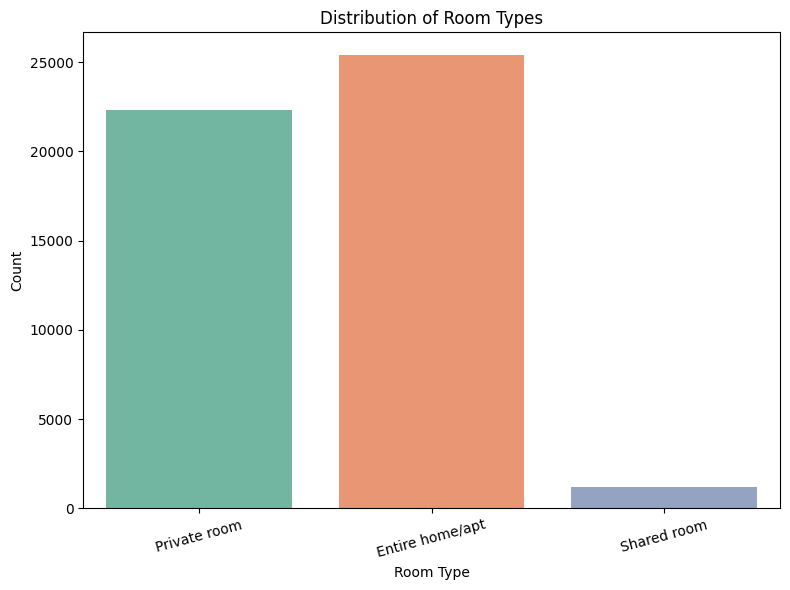

In [13]:
# 1. Distribution of Room Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type', palette='Set2')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


 2. Average Price by Neighbourhood Group

Manhattan has the highest average prices by a large margin.

Brooklyn and Staten Island follow, while Bronx and Queens are the most affordable.

<ipython-input-14-471dc29cadb2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='Set3')


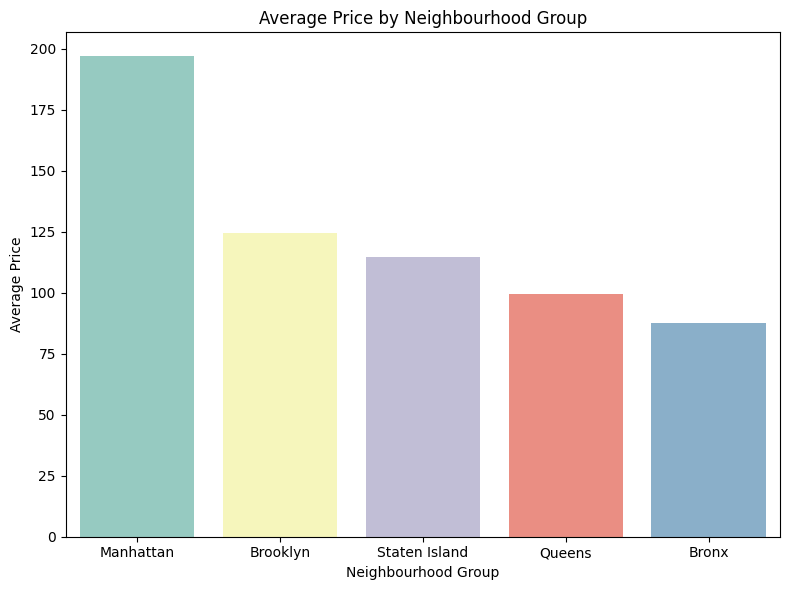

In [14]:
# 2. Average Price by Neighbourhood Group
plt.figure(figsize=(8, 6))
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values, palette='Set3')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


3. Number of Listings by Neighbourhood Group

Manhattan and Brooklyn dominate in terms of number of listings.

Staten Island and Bronx have very few listings.

<ipython-input-15-e1d97dc865e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='Set1')


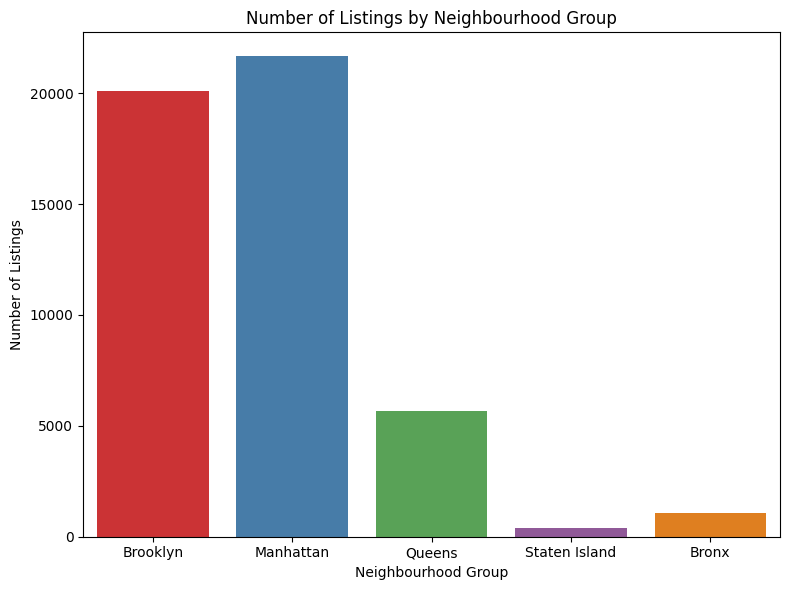

In [15]:
# 3. Number of Listings by Neighbourhood Group
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='neighbourhood_group', palette='Set1')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()



4. Price Distribution

Price distribution is right-skewed, meaning most listings are under $200, but there are some very high-priced ones.

Outliers (extremely high prices) were removed for clarity (above $1000).

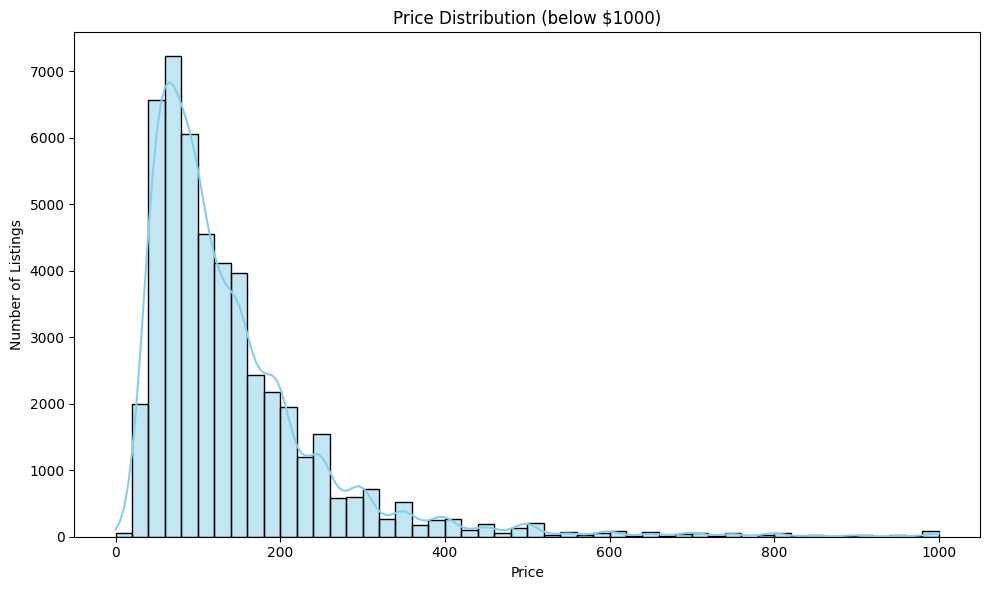

In [16]:
# 4. Price Distribution (Filtered)
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['price'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution (below $1000)')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


5. Availability by Room Type

Shared rooms tend to have the highest availability throughout the year.

Private rooms and entire apartments show a wide range of availability, with many listings not available for much of the year.

<ipython-input-17-d70750699dcb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='availability_365', palette='pastel')


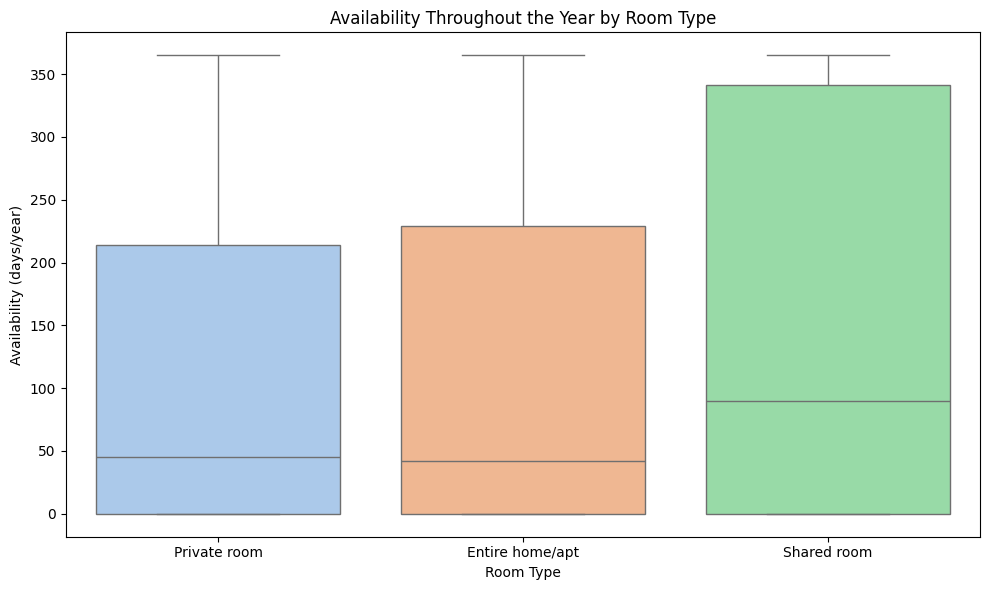

In [17]:
# 5. Availability by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='availability_365', palette='pastel')
plt.title('Availability Throughout the Year by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (days/year)')
plt.tight_layout()
plt.show()

6. Reviews per Month Distribution

Most listings have fewer than 2 reviews per month, suggesting limited guest traffic for many listings.

A few listings are outliers with very high review frequency.

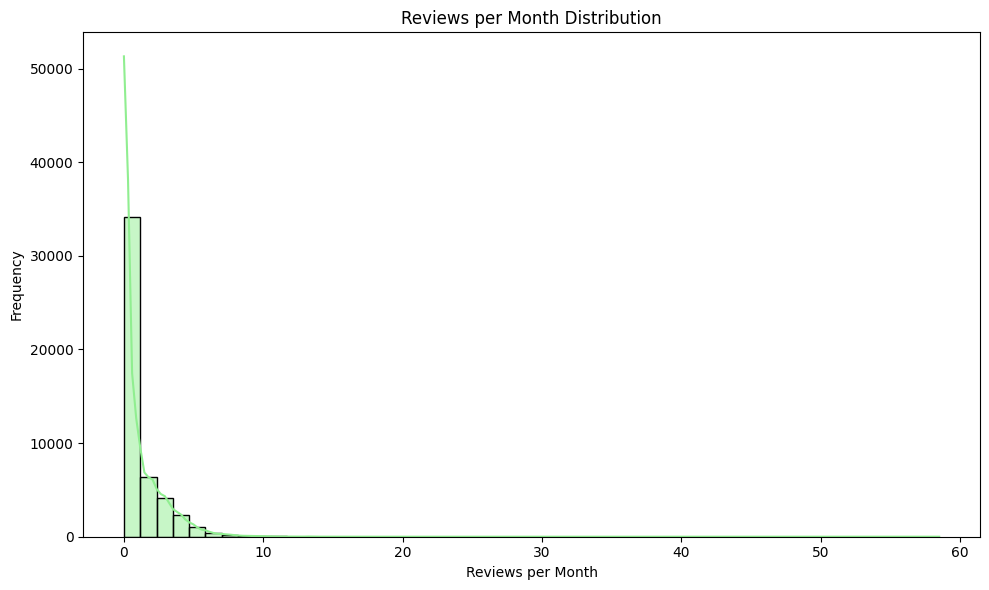

In [18]:

# 6. Reviews per Month Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=50, color='lightgreen', kde=True)
plt.title('Reviews per Month Distribution')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


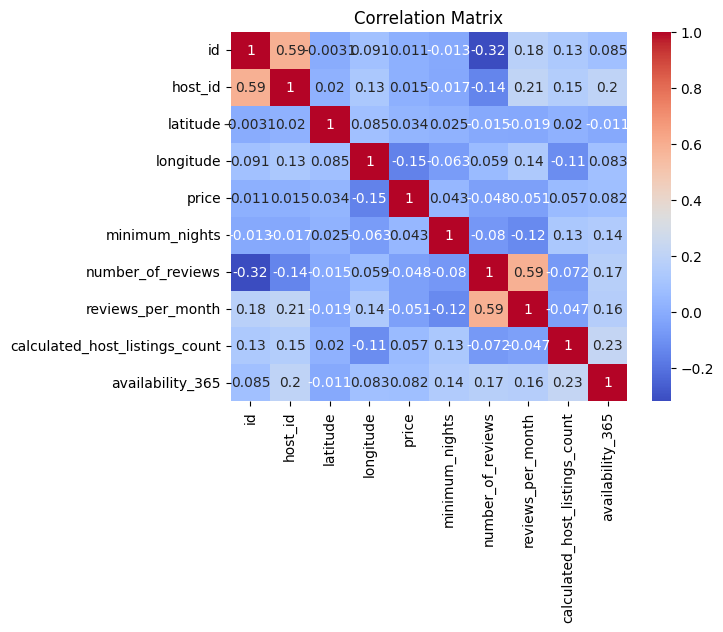

In [19]:
## 📉 7. Statistical Analysis (Optional)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# **Remark**: Reviews per month slightly correlates with number of reviews.




## 📌 8. Conclusion
- Manhattan is the most expensive and popular location.
- Entire apartments are preferred.
- Listings are often seasonal or partially available.
- Price and review patterns vary significantly across boroughs.


## 🔁 9. GitHub Commits
> 💡 Recommended commit checkpoints:
- ✅ Initial commit: dataset + notebook setup
- ✅ After data cleaning
- ✅ After each major visualization
- ✅ Final version with conclusion